In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.layers import Dense, ReLU, Activation, LeakyReLU, BatchNormalization, Dropout
import tensorflow as tf

# Activer l'exécution éager si elle n'est pas déjà activée
tf.config.experimental_run_functions_eagerly(True)



Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


### Exercice 1 : Acquisition et Exploration des Données 

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Chargement des données
iris = load_iris()

# Création d'un DataFrame pour faciliter l'analyse
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
#Affichage des differences classes et leurs distributions
distribution_classe = df['target_name'].value_counts()
distribution_classe

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


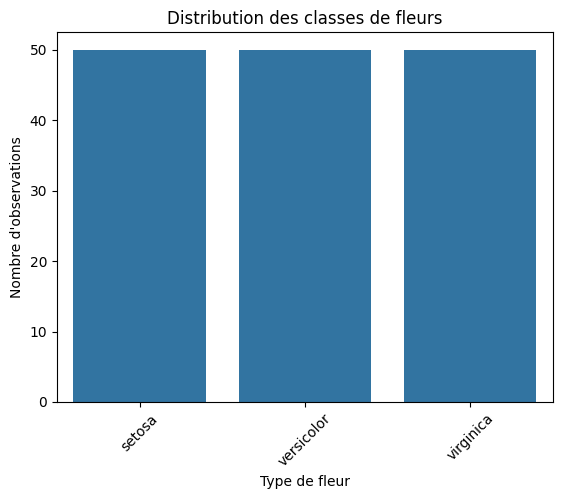

In [5]:
# Distribution des classes cibles
class_distribution = df['target_name'].value_counts()
print(class_distribution)

# Affichage sous forme de graphique
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='target_name')
plt.title("Distribution des classes de fleurs")
plt.xlabel("Type de fleur")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=45)
plt.show()

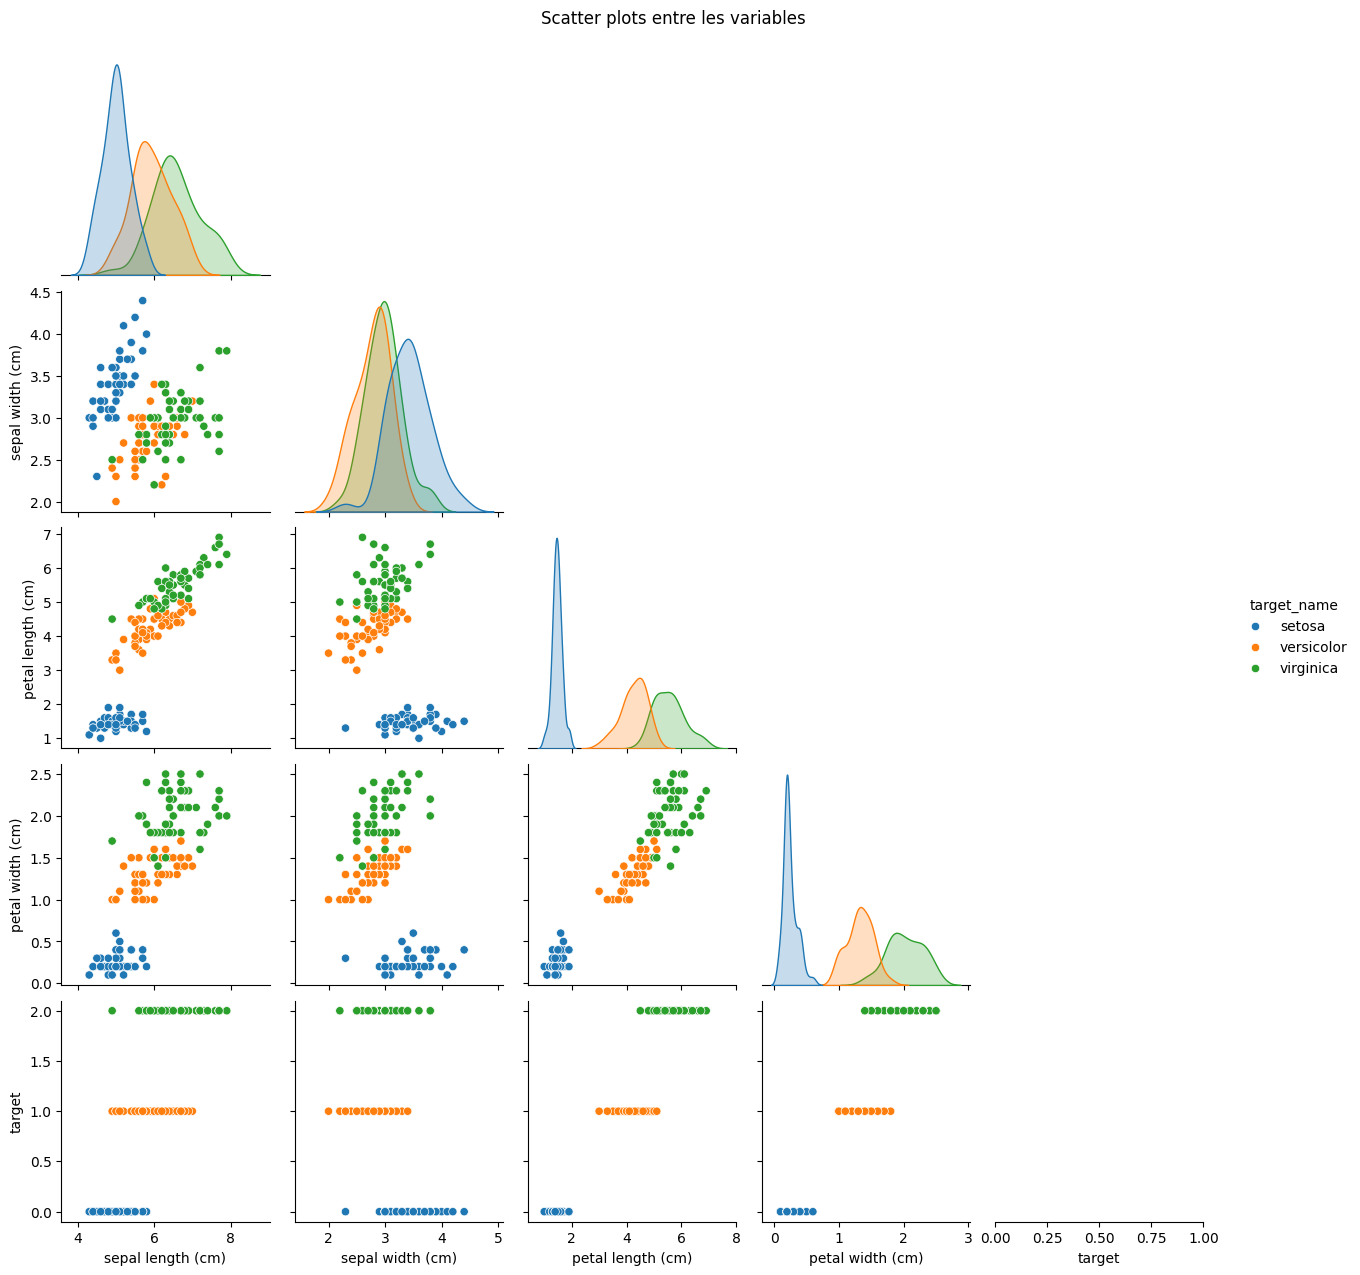

In [6]:
# Scatter matrix pour voir les relations entre variables
sns.pairplot(df, hue='target_name', corner=True)
plt.suptitle("Scatter plots entre les variables", y=1.02)
plt.show()


### Exercice 2 : Implémentation du Perceptron 

In [7]:
# Filtrage binaire
filter_binary_classes = lambda df: df[df['target'] != 2]
df_binary = filter_binary_classes(df)

# Sélection des features
X = df_binary[['sepal length (cm)', 'sepal width (cm)']].values
y = df_binary['target'].map(lambda v: 1 if v == 1 else -1).values

In [8]:
# Implementation du perceptron
def perceptron(X, y, eta=0.01, n_iter=50):
    w = np.zeros(1 + X.shape[1])
    errors = []

    for _ in range(n_iter):
        update = lambda xi, target: eta * (target - predict(xi, w))
        delta_w = lambda xi, upd: eta * upd * xi

        for xi, target in zip(X, y):
            upd = update(xi, target)
            w[1:] += delta_w(xi, upd)
            w[0] += upd
        errors.append(np.sum([int(predict(xi, w) != target) for xi, target in zip(X, y)]))

    return w, errors

predict = lambda xi, w: np.where(np.dot(xi, w[1:]) + w[0] >= 0.0, 1, -1)


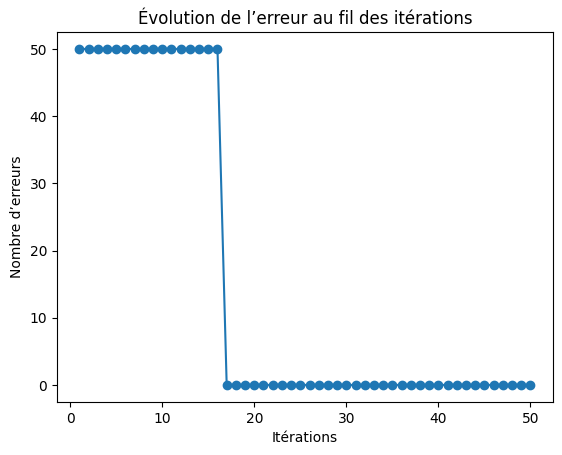

In [9]:
# Entrainement et visuakisation de l'évolution de l'erreur
weights, errors = perceptron(X, y, eta=0.1, n_iter=50)

# Affichage de l'erreur
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Itérations')
plt.ylabel('Nombre d’erreurs')
plt.title('Évolution de l’erreur au fil des itérations')
plt.show()



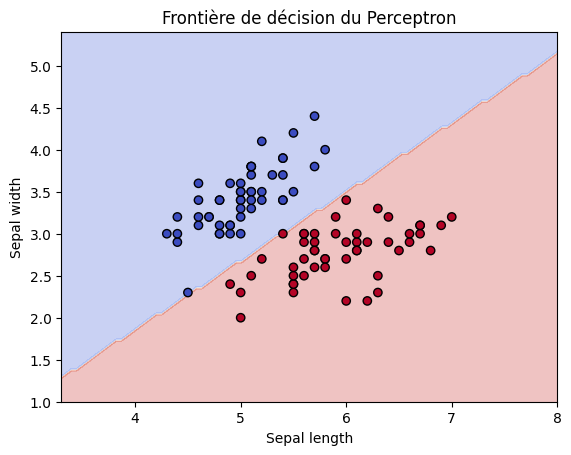

In [10]:
# Visualisation de la frontière de décision
def plot_decision_boundary(X, y, w):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = np.array([predict(np.array([xi, yi]), w) for xi, yi in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Frontière de décision du Perceptron')
    plt.show()

plot_decision_boundary(X, y, weights)


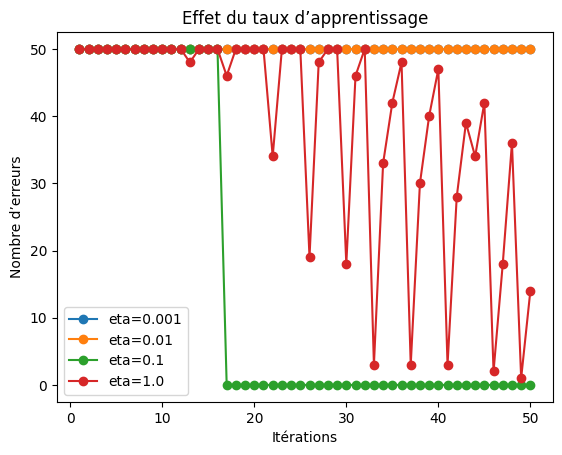

In [11]:
etas = [0.001, 0.01, 0.1, 1.0]

for eta in etas:
    _, errors = perceptron(X, y, eta=eta, n_iter=50)
    plt.plot(range(1, len(errors)+1), errors, marker='o', label=f'eta={eta}')

plt.xlabel('Itérations')
plt.ylabel('Nombre d’erreurs')
plt.title('Effet du taux d’apprentissage')
plt.legend()
plt.show()


### Exercice 3 : Implémentation d’un MLP Basique 

In [12]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding des classes
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [13]:
# Création du modèle MLP
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Couche cachée avec 10 neurones
    Dense(3, activation='softmax')  # Couche de sortie avec 3 neurones (3 classes)
])

c:\Users\heumo\Projet MD5\projet_reseaux_neurone\venv_reseaux_neurone\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compilation et résumé du modèle
'''
Avant d’entraîner le modèle, nous le compilons avec l’optimiseur
 Adam (très efficace pour les problèmes de classification) 
 et la fonction de perte categorical_crossentropy adaptée à 
 la classification multiclasse
 '''
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# Affichage de l'architecture du modèle
model.summary()  # Permet de voir la structure du modèle (couches, paramètres)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Entraînement du modèle

'''
Nous entraînons le modèle sur 50 époques, avec un batch size
de 8 et 10% de validation pour suivre la performance pendant l’entraînement.
'''
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)


c:\Users\heumo\Projet MD5\projet_reseaux_neurone\venv_reseaux_neurone\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2279 - loss: 1.0960 - val_accuracy: 0.2500 - val_loss: 1.0774
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2907 - loss: 1.0178 - val_accuracy: 0.2500 - val_loss: 1.0414
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3583 - loss: 0.9731 - val_accuracy: 0.5833 - val_loss: 1.0059
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5052 - loss: 0.9193 - val_accuracy: 0.5000 - val_loss: 0.9728
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6611 - loss: 0.8482 - val_accuracy: 0.5000 - val_loss: 0.9431
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6724 - loss: 0.8008 - val_accuracy: 0.5000 - val_loss: 0.9150
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7678 - loss: 0.7800 - val_accuracy: 0.5000 - val_loss: 0.8880
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7690 - loss: 0.7400 - val_accuracy: 0.5000 - v

In [16]:
# Évaluation sur le jeu de test

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy sur le set de test : {accuracy:.2f}')


Accuracy sur le set de test : 0.87


### Exercice 4 : Entraînement et Évaluation du Modèle 

In [17]:
# Compilation du modèle avec Adam et categorical_crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Séparation des données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [18]:
# Entraînement du modèle pendant 100 époques
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=1)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8707 - loss: 0.2796 - val_accuracy: 0.7500 - val_loss: 0.5189
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8819 - loss: 0.2583 - val_accuracy: 0.7500 - val_loss: 0.5111
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9235 - loss: 0.2157 - val_accuracy: 0.7500 - val_loss: 0.5049
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8518 - loss: 0.2491 - val_accuracy: 0.9167 - val_loss: 0.5017
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8746 - loss: 0.2271 - val_accuracy: 0.8333 - val_loss: 0.4952
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9348 - loss: 0.1850 - val_accuracy: 0.9167 - val_loss: 0.4921
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8461 - loss: 0.2619 - val_accuracy: 0.9167 - val_loss: 0.4925
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8725 - loss: 0.2402 - val_accuracy: 0.

In [19]:
# Évaluation du modèle sur le jeu de test
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Perte sur le test set : {loss:.4f}')
print(f'Exactitude sur le test set : {accuracy:.4f}')


Perte sur le test set : 0.1108
Exactitude sur le test set : 0.9667


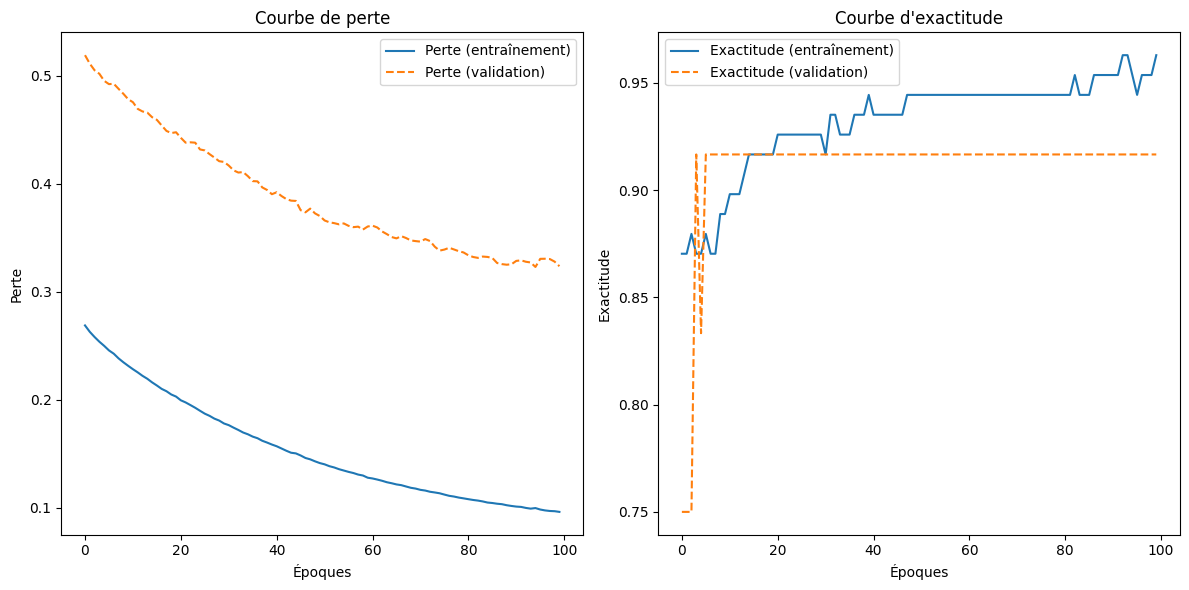

In [20]:
import matplotlib.pyplot as plt

# Tracer la courbe de perte
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)', linestyle='--')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Tracer la courbe d'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitude (entraînement)')
plt.plot(history.history['val_accuracy'], label='Exactitude (validation)', linestyle='--')
plt.title('Courbe d\'exactitude')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()

plt.tight_layout()
plt.show()


###  Expérimentation et Amélioration du Modèle 


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Charger le dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Convertir les labels en one-hot encoding
y = to_categorical(y, num_classes=3)

# Séparer les données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionnaire d'optimiseurs
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Fonction de construction du modèle avec différentes configurations
def build_mlp_with_architecture(input_shape, hidden_units=[10, 20], activation='relu', dropout_rate=0.5, batch_norm=False):
    model = Sequential()

    # Première couche cachée
    model.add(Dense(hidden_units[0], input_shape=(input_shape,)))
    if activation == 'relu':
        model.add(ReLU())
    elif activation == 'leakyrelu':
        model.add(LeakyReLU())
    elif activation == 'tanh':
        model.add(Activation('tanh'))
    
    if batch_norm:
        model.add(BatchNormalization())  # Batch Normalization

    # Dropout après la première couche
    model.add(Dropout(dropout_rate))

    # Deuxième couche cachée
    model.add(Dense(hidden_units[1]))
    if activation == 'relu':
        model.add(ReLU())
    elif activation == 'leakyrelu':
        model.add(LeakyReLU())
    elif activation == 'tanh':
        model.add(Activation('tanh'))
    
    if batch_norm:
        model.add(BatchNormalization())  # Batch Normalization

    # Dropout après la deuxième couche
    model.add(Dropout(dropout_rate))

    # Couche de sortie avec Softmax pour la classification multi-classes
    model.add(Dense(3, activation='softmax'))

    return model

# Initialisation du dictionnaire pour stocker les résultats
history_dict = {}

# Comparaison des performances sur plusieurs architectures et optimiseurs
for opt_name, optimizer in optimizers.items():
    for activation in ['relu', 'leakyrelu', 'tanh']:
        for dropout_rate in [0.2, 0.5, 0.7]:  # Différents taux de dropout
            for batch_norm in [True, False]:  # Tester avec et sans Batch Normalization
                print(f"\nEntraînement avec optimiseur {opt_name}, activation {activation}, dropout={dropout_rate}, batch_norm={batch_norm}...\n")

                # Construction du modèle avec une architecture spécifique
                model = build_mlp_with_architecture(X_train.shape[1], hidden_units=[10, 20], activation=activation, 
                                                     dropout_rate=dropout_rate, batch_norm=batch_norm)
                model.compile(optimizer=optimizer,
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

                # Entraînement du modèle
                history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=0)

                # Évaluation du modèle
                loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

                # Enregistrement des résultats dans history_dict
                history_dict[f'{opt_name}_{activation}_dropout{dropout_rate}_batchnorm{batch_norm}'] = {
                    'history': history,
                    'loss': loss,
                    'accuracy': accuracy
                }

                print(f"Test set - Perte : {loss:.4f} - Exactitude : {accuracy:.4f}")



Entraînement avec optimiseur SGD, activation relu, dropout=0.2, batch_norm=True...

Test set - Perte : 0.1361 - Exactitude : 1.0000

Entraînement avec optimiseur SGD, activation relu, dropout=0.2, batch_norm=False...



ValueError: Unknown variable: <Variable path=sequential_17/dense_50/kernel, shape=(4, 10), dtype=float32, value=[[ 0.20562267  0.5452237   0.4555987   0.31946236 -0.30856553 -0.5267011
   0.56993556 -0.6162251   0.02552122 -0.45519686]
 [-0.19146138 -0.30514327 -0.48279253  0.48373795 -0.08449167  0.14868039
   0.4952016   0.3654778  -0.10249162 -0.5408649 ]
 [ 0.06680465  0.05457079  0.22374362  0.12640458 -0.5463836   0.52466404
  -0.17491487 -0.08920425  0.26013637  0.29481864]
 [ 0.3098287   0.3518368  -0.322933    0.54786825 -0.30222407 -0.25924778
   0.05875975  0.52558327 -0.45424473 -0.07483441]]>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

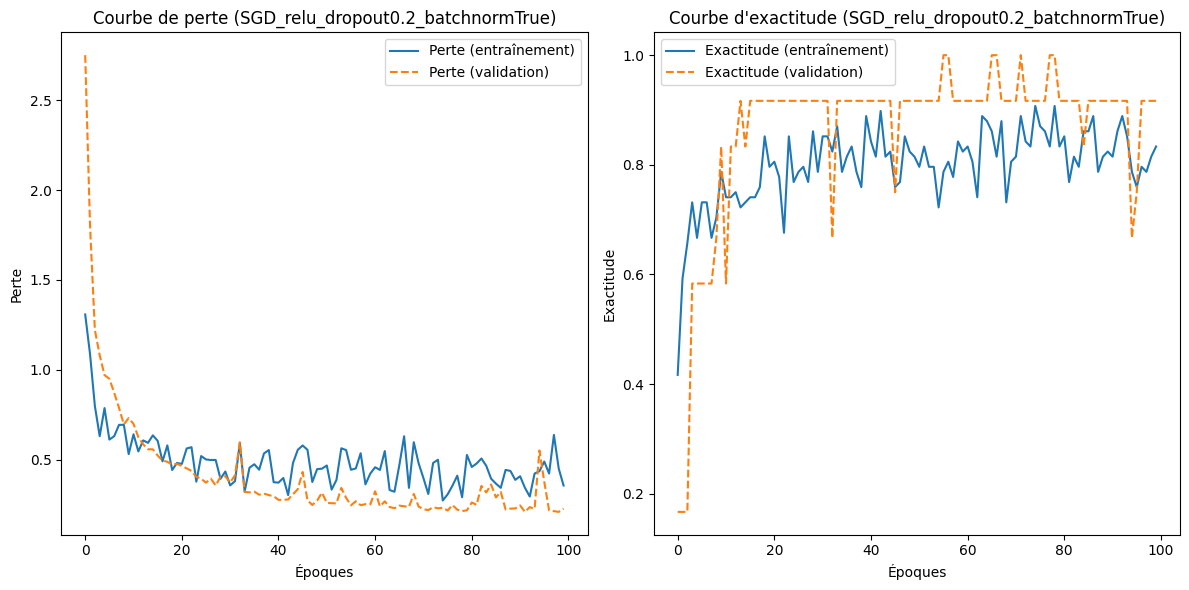

In [40]:
# Tracer les courbes pour comparer les résultats
for key, value in history_dict.items():
    history = value['history']
    plt.figure(figsize=(12, 6))

    # Courbe de perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perte (entraînement)')
    plt.plot(history.history['val_loss'], label='Perte (validation)', linestyle='--')
    plt.title(f'Courbe de perte ({key})')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    # Courbe d'exactitude
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Exactitude (entraînement)')
    plt.plot(history.history['val_accuracy'], label='Exactitude (validation)', linestyle='--')
    plt.title(f'Courbe d\'exactitude ({key})')
    plt.xlabel('Époques')
    plt.ylabel('Exactitude')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [29]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD,
    'Adam': tf.keras.optimizers.Adam,
    'RMSprop': tf.keras.optimizers.RMSprop,
}


In [30]:
# Initialisation du dictionnaire pour stocker les résultats
history_dict = {}

# Comparaison des performances sur plusieurs architectures et optimiseurs
for opt_name, optimizer_class in optimizers.items():  # Ici, on suppose que optimizers est un dictionnaire des classes d'optimiseur
    for activation in ['relu', 'leakyrelu', 'tanh']:
        print(f"\nEntraînement avec optimiseur {opt_name} et activation {activation}...\n")

        # Création d'une nouvelle instance de l'optimiseur pour chaque itération
        optimizer = optimizer_class()  # Créer une nouvelle instance de l'optimiseur

        # Construction du modèle avec une architecture spécifique
        model = build_mlp_with_architecture(X_train.shape[1], hidden_units=[10, 20], activation=activation)
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Entraînement du modèle
        history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=0)

        # Évaluation du modèle
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Enregistrement des résultats
        history_dict[f'{opt_name}_{activation}'] = {
            'history': history,
            'loss': loss,
            'accuracy': accuracy
        }

        print(f"Test set - Perte : {loss:.4f} - Exactitude : {accuracy:.4f}")



Entraînement avec optimiseur SGD et activation relu...

Test set - Perte : 0.1353 - Exactitude : 0.9667

Entraînement avec optimiseur SGD et activation leakyrelu...

Test set - Perte : 0.1351 - Exactitude : 0.9333

Entraînement avec optimiseur SGD et activation tanh...

Test set - Perte : 0.1481 - Exactitude : 0.9667

Entraînement avec optimiseur Adam et activation relu...

Test set - Perte : 0.0513 - Exactitude : 1.0000

Entraînement avec optimiseur Adam et activation leakyrelu...

Test set - Perte : 0.0460 - Exactitude : 1.0000

Entraînement avec optimiseur Adam et activation tanh...

Test set - Perte : 0.0740 - Exactitude : 0.9667

Entraînement avec optimiseur RMSprop et activation relu...

Test set - Perte : 0.0535 - Exactitude : 0.9667

Entraînement avec optimiseur RMSprop et activation leakyrelu...

Test set - Perte : 0.0791 - Exactitude : 0.9667

Entraînement avec optimiseur RMSprop et activation tanh...

Test set - Perte : 0.0650 - Exactitude : 0.9667


In [32]:
# Initialisation du dictionnaire pour stocker les résultats
history_dict = {}

# Comparaison des performances sur plusieurs architectures et optimiseurs
for opt_name, optimizer in optimizers.items():
    for activation in ['relu', 'leakyrelu', 'tanh']:
        print(f"\nEntraînement avec optimiseur {opt_name} et activation {activation}...\n")

        # Construction du modèle avec une architecture spécifique
        model = build_mlp_with_architecture(X_train.shape[1], hidden_units=[10, 20], activation=activation)
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Entraînement du modèle
        history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=0)

        # Évaluation du modèle
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Enregistrement des résultats dans history_dict
        history_dict[f'{opt_name}_{activation}'] = {
            'history': history,
            'loss': loss,
            'accuracy': accuracy
        }

        print(f"Test set - Perte : {loss:.4f} - Exactitude : {accuracy:.4f}")



Entraînement avec optimiseur SGD et activation relu...



ValueError: Could not interpret optimizer identifier: <class 'keras.src.optimizers.sgd.SGD'>

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, Activation

# Fonction de construction du MLP
def build_mlp_with_architecture(input_shape, hidden_units=[10, 20], activation='relu'):
    model = Sequential()

    # Première couche cachée
    model.add(Dense(hidden_units[0], input_shape=(input_shape,)))
    
    # Activation en fonction du type
    if activation == 'relu':
        model.add(ReLU())
    elif activation == 'leakyrelu':
        model.add(LeakyReLU())
    elif activation == 'tanh':
        model.add(Activation('tanh'))

    # Deuxième couche cachée
    model.add(Dense(hidden_units[1]))
    if activation == 'relu':
        model.add(ReLU())
    elif activation == 'leakyrelu':
        model.add(LeakyReLU())
    elif activation == 'tanh':
        model.add(Activation('tanh'))

    # Couche de sortie avec Softmax pour la classification multi-classes
    model.add(Dense(3, activation='softmax'))  # Le nombre de classes dans le dataset Iris est 3

    return model


In [35]:
import matplotlib.pyplot as plt

# Tracer les courbes pour comparer les résultats
for key, value in history_dict.items():
    history = value['history']
    plt.figure(figsize=(12, 6))

    # Courbe de perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perte (entraînement)')
    plt.plot(history.history['val_loss'], label='Perte (validation)', linestyle='--')
    plt.title(f'Courbe de perte ({key})')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    # Courbe d'exactitude
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Exactitude (entraînement)')
    plt.plot(history.history['val_accuracy'], label='Exactitude (validation)', linestyle='--')
    plt.title(f'Courbe d\'exactitude ({key})')
    plt.xlabel('Époques')
    plt.ylabel('Exactitude')
    plt.legend()

    plt.tight_layout()
    plt.show()
